# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [5]:
# Let's visualize it!
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


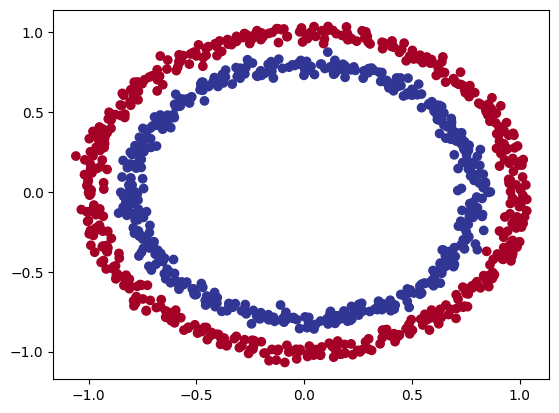

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.show()

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak...

In [9]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 2ms/step - loss: 4.7320 - accuracy: 0.4740
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9831 - accuracy: 0.4740
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.1686 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7249 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.5050


In [10]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we are working on a binary classification problem and our model is getting around 50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=10, verbose=0)

In [12]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5420


[0.6933573484420776, 0.5419999957084656]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within the layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6663 - accuracy: 0.4550
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7172 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.5150
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6987 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.4590
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5070
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5190
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4860
Epoch 11/

In [14]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.5050


[0.6985818147659302, 0.5049999952316284]

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this functions will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions accros the meshgrids
* Plot the predictions as well as a line between zones (where each unique class falls)

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values (we are going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We habe to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 881us/step
doing binary classification


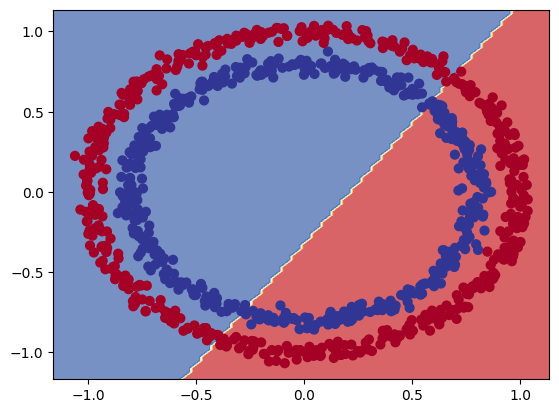

In [16]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [17]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create somre regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
# model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Oh wait... we comipled our model for a binary classification problem.

But... er are now working on a regression problem, let's change the model to suit our data.

In [18]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 440.6505 - mae: 440.6505
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 356.0861 - mae: 356.0861
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 272.8785 - mae: 272.8785
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 184.2453 - mae: 184.2453
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 89.7470 - mae: 89.7470
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 54.3289 - mae: 54.3289
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 73.7237 - mae: 73.7237
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 58.9645 - mae: 58.9645
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 44.0905 - mae: 44.0905
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 48.9570 - mae: 48.9570
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 2ms/step


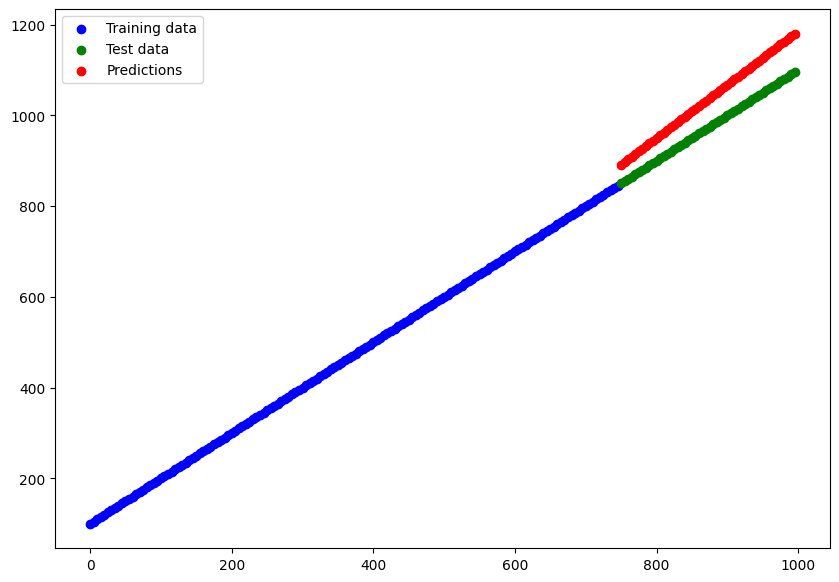

In [19]:
# Make predictinos with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()
plt.show()

## The missing piece: Non-linearity

In [20]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100


c:\Users\Usuario\anaconda3\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 0s 2ms/step - loss: 5.3186 - accuracy: 0.4780
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2676 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1161 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9749 - accuracy: 0.4750
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8149 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6740 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6238 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5670 - accuracy: 0.4740
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5567 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5544 - accuracy: 0.4730
Epoch 11/100
32/32 [=

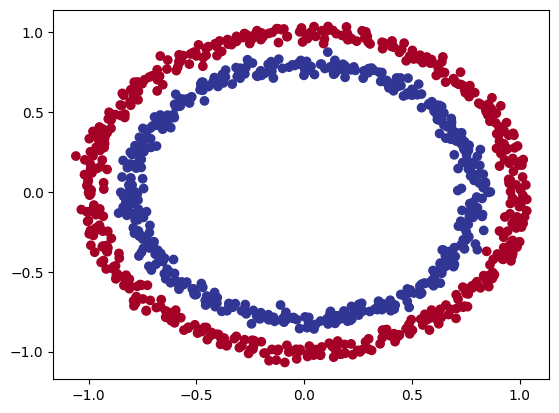

In [21]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 764us/step
doing binary classification


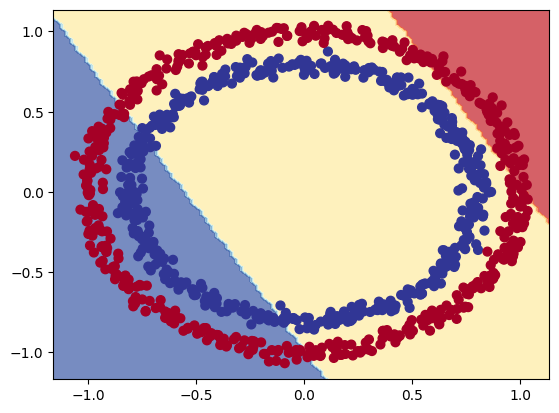

In [22]:
# Check the decision boundary for our latest model
plot_decision_boundary(model_4,
                       X, y)

Let's try build our first neural network with a non-linear activation function.

In [23]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5504 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4776 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4626 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4448 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4393 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4375 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4275 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4256 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4252 - accuracy: 0.4780
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4194 - accuracy: 0.4790
Epoch 11/

In [24]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 1.3155 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 1.0302 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.9244 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8669 - accuracy: 0.4820
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.8357 - accuracy: 0.3640
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8176 - accuracy: 0.2950
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8062 - accuracy: 0.3070
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7965 - accuracy: 0.3380
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.7882 - accuracy: 0.3240
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7808 - accuracy: 0.3140
Epoch 11/

In [25]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8200


[0.3405681550502777, 0.8199999928474426]

313/313 [==============================] - 0s 791us/step
doing binary classification


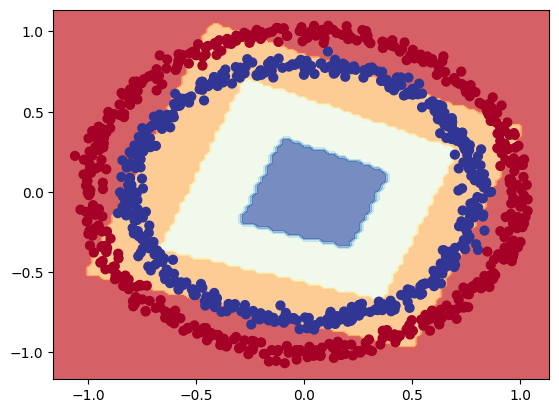

In [26]:
# How do our model predictions look
plot_decision_boundary(model_6, X, y)

In [27]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_7.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5030
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5210
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5290
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5330
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6854 - accuracy: 0.5530
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5480
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.6060
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.6200
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.6110
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.6020
Epoch 11/

313/313 [==============================] - 0s 735us/step
doing binary classification


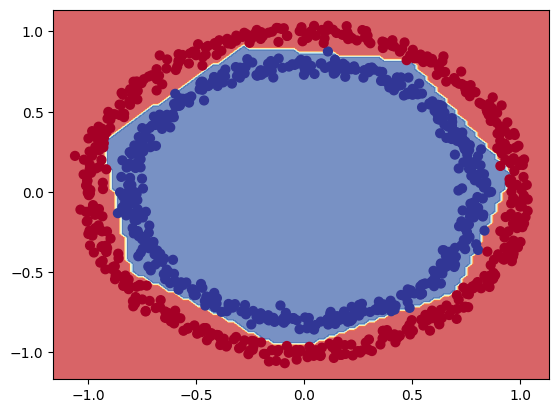

In [28]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_7, X, y)

**Question:** What's wrong the predictions we have made? Are we really evaluating our model correctly?

**Note:** The combination of **linear (straight line) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we have discussed yhe concept of linear and non-linear functions (or lines), let's see them in action.

In [29]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

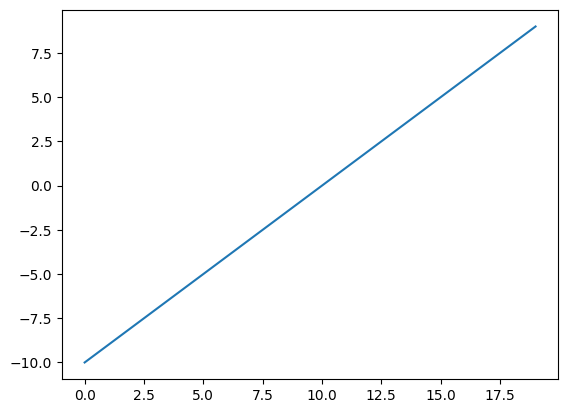

In [30]:
# Visualize our toy tensor
plt.plot(A);

In [31]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

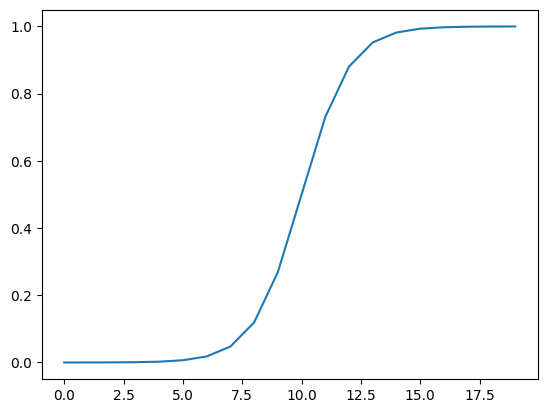

In [32]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

In [33]:
# Let's recreate ReLU function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

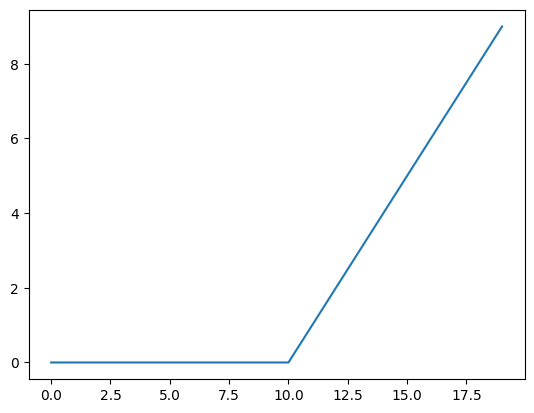

In [34]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

In [35]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

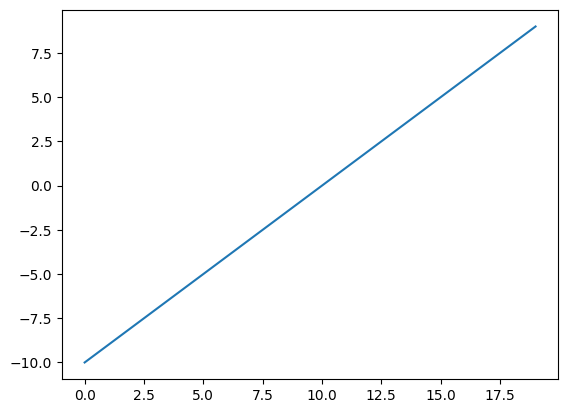

In [36]:
# Does the linear activation function change anything
plt.plot(tf.keras.activations.linear(A));

## Evaluating and improving our classification

So far we have been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [37]:
# Check how many examples we have
len(X)

1000

In [38]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [39]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [40]:
# Let's recreate a model to fit on the training data and evaluate on the test set

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.4425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4863
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.4988
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5312
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.5412
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.5525
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.7138
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6169 - accuracy: 0.7138
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5824 - accuracy: 0.7625
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7688
Epoch 11/25
25/25 [

In [41]:
# 4. Evaluate the model on the test set
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8700


[0.36413151025772095, 0.8700000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 779us/step
doing binary classification


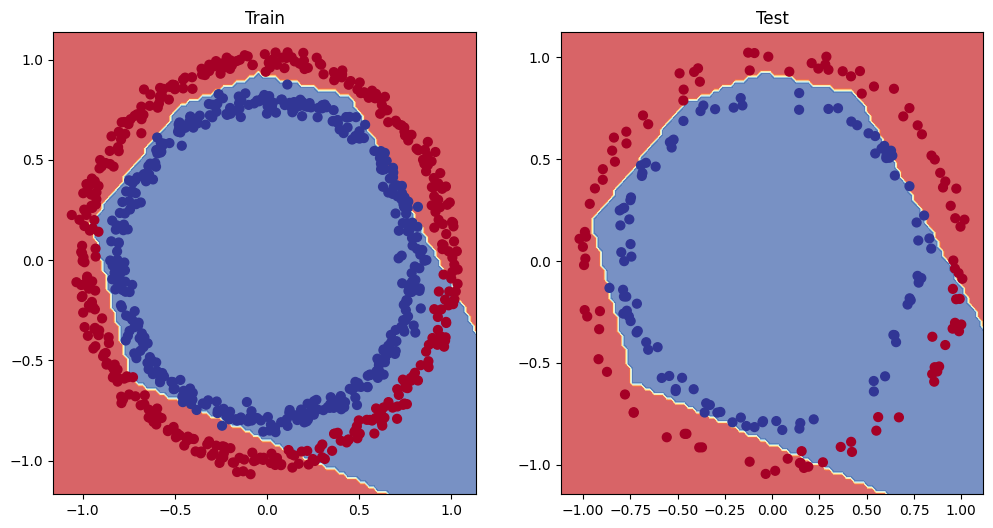

In [42]:
# Plot the decision boundaries for the training and the test set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)

## Plot the loss (or training) curves

In [43]:
# Convertt the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.700690,0.44250
1,0.695032,0.48625
2,0.691545,0.49875
3,0.686223,0.53125
4,0.679602,0.54125
5,0.665383,0.55250
6,0.641652,0.71375
7,0.616858,0.71375
8,0.582361,0.76250
9,0.545553,0.76875


Text(0.5, 1.0, 'Model_8 ')

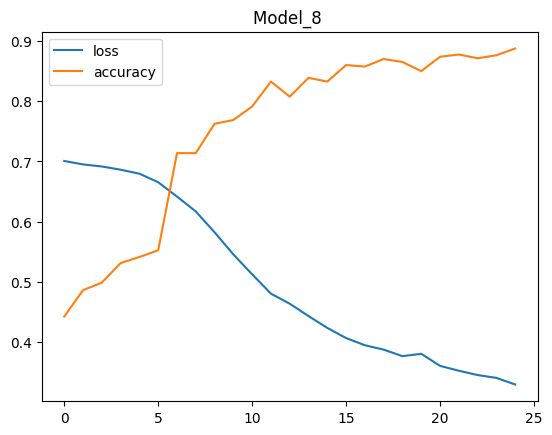

In [44]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 ")

**Note:** For many problems, the loss function going down means the model is improving.

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we are practicing building models here).
* A modified loss curves plot.

In [45]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# 3. Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train, 
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.4950 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.4963 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4938 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

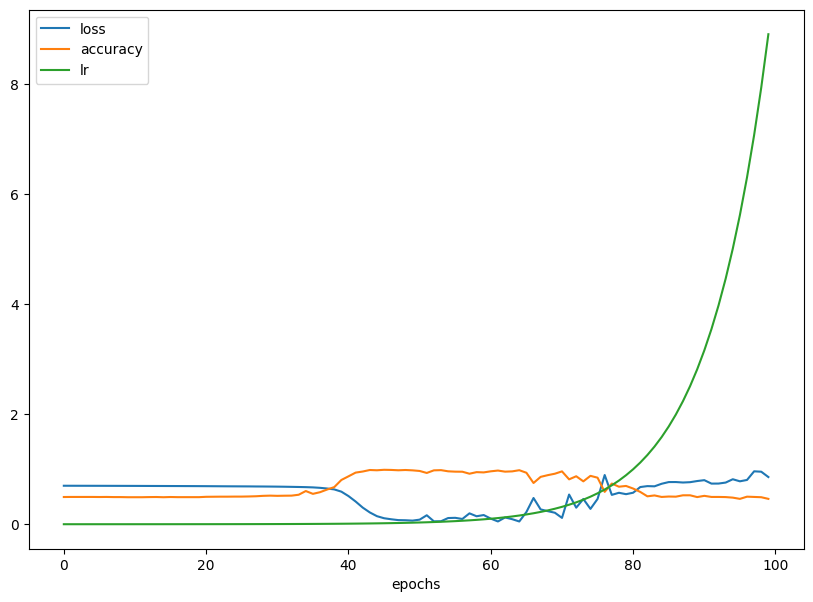

In [46]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning Rate vs Loss')

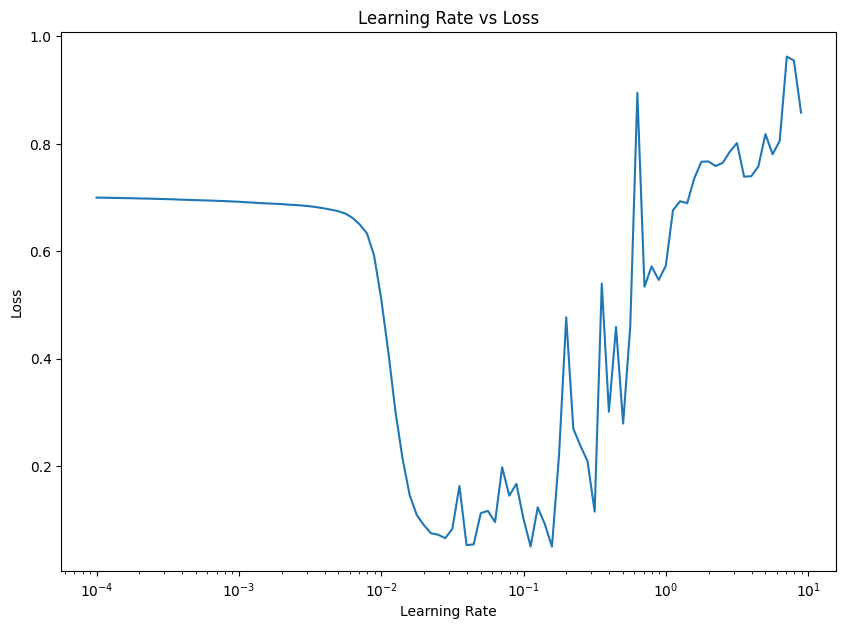

In [50]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [51]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                 metrics=['accuracy'])

# 3. Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 3ms/step - loss: 0.7066 - accuracy: 0.4737
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4762
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5337
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6913 - accuracy: 0.5125
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5063
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.5962
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.6175
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.6212
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.6737
Epoch 11/20
25/25 [